In [46]:
import numpy as np
import pandas as pd

import re

import os.path
from os import path

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.cluster import KMeans

import wrangle as wr
import preprocessing as pr
from preprocessing_permits import permits_preprocessing_mother_function
import explore as ex
import model as mo

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = permits_preprocessing_mother_function()

In [47]:
df

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,...,market_volume,market_volume_delta_pct,ei,city_state,five_or_more_units_bldgs_est_2y,five_or_more_units_value_est_2y,should_enter,market_share,market_index,enter_index
0,Albany,NY,1997,30.0,425.0,17871000.0,14.166667,5.957000e+05,42049.411765,NaN,...,2.054924e+10,-0.655038,NaN,Albany_NY,NaN,NaN,False,0.000870,NaN,NaN
1,Albany,NY,1998,47.0,1038.0,54232000.0,22.085106,1.153872e+06,52246.628131,0.566667,...,2.529787e+10,0.231085,2.465010,Albany_NY,NaN,NaN,False,0.002144,NaN,NaN
2,Albany,NY,1999,39.0,515.0,24484000.0,13.205128,6.277949e+05,47541.747573,-0.170213,...,2.609590e+10,0.031545,0.437662,Albany_NY,0.170673,0.472309,False,0.000938,0.000443,1.473690
3,Albany,NY,2000,25.0,346.0,16130000.0,13.840000,6.452000e+05,46618.497110,-0.358974,...,2.742204e+10,0.050818,0.626938,Albany_NY,0.625000,0.181828,False,0.000588,0.000107,1.182523
4,Albany,NY,2001,56.0,502.0,24536000.0,8.964286,4.381429e+05,48876.494024,1.240000,...,2.913103e+10,0.062322,1.431902,Albany_NY,-0.266667,-0.570875,False,0.000842,-0.000481,0.429487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,York,PA,2015,3.0,53.0,3185000.0,17.666667,1.061667e+06,60094.339623,-0.666667,...,5.200240e+10,0.313639,0.418895,York_PA,-0.109677,0.450996,False,0.000061,0.000028,1.451085
2986,York,PA,2016,3.0,34.0,1566000.0,11.333333,5.220000e+05,46058.823529,0.000000,...,4.928300e+10,-0.052294,0.518810,York_PA,0.093333,0.179576,False,0.000032,0.000006,1.179614
2987,York,PA,2017,15.0,83.0,10204000.0,5.533333,6.802667e+05,122939.759036,4.000000,...,5.158824e+10,0.046775,6.224796,York_PA,-0.407407,0.268569,False,0.000198,0.000053,1.268820
2988,York,PA,2018,2.0,26.0,2160000.0,13.000000,1.080000e+06,83076.923077,-0.866667,...,5.336251e+10,0.034393,0.204643,York_PA,-0.138996,-0.141515,False,0.000040,-0.000006,0.858520


In [48]:
df['market_share'] = (df.total_high_density_value / df.market_volume)

The top 130 markets are responsible for 83-90% of all new build

In [49]:
df.groupby('year').market_share.sum()

year
1997    0.851691
1998    0.862223
1999    0.861109
2000    0.862123
2001    0.867843
2002    0.844428
2003    0.838562
2004    0.815080
2005    0.814747
2006    0.873535
2007    0.877005
2008    0.881456
2009    0.850193
2010    0.836524
2011    0.874833
2012    0.894764
2013    0.899556
2014    0.915763
2015    0.905623
2016    0.900888
2017    0.903146
2018    0.898715
2019    0.879551
Name: market_share, dtype: float64

In [31]:
df['enter_index'] = (1 + df.market_share) * (1 + df.five_or_more_units_value_est_2y)

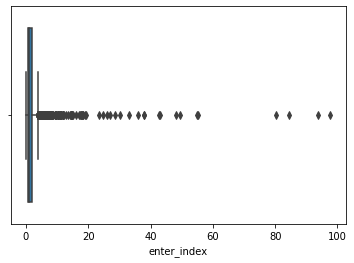

In [35]:
sns.boxplot(df.enter_index)

In [40]:
(df.enter_index > 0).mean()

0.9130434782608695

In [41]:
df.enter_index.nlargest(1)

1810    97.698364
Name: enter_index, dtype: float64

In [43]:
df.loc[1810]

city                                          Minneapolis
state                                                  MN
year                                                 2013
total_high_density_bldgs                               65
total_high_density_units                             4766
total_high_density_value                       6.9994e+08
avg_units_per_bldg                                73.3231
value_per_bldg                                1.07683e+07
value_per_unit                                     146861
city_state_high_density_bldgs_delta_pct          0.031746
city_state_high_density_units_delta_pct         -0.151806
city_state_high_density_value_delta_pct         0.0204784
market_volume                                  3.3211e+10
market_volume_delta_pct                          0.292291
ei                                               0.789666
city_state                                 Minneapolis_MN
five_or_more_units_bldgs_est_2y                        19
five_or_more_u

In [45]:
df.total_high_density_value.nlargest()

1950    8.471944e+09
1954    5.464424e+09
1953    4.611490e+09
1952    4.600992e+09
1605    3.893760e+09
Name: total_high_density_value, dtype: float64

In [58]:
scatter = df.groupby('city_state')[['ei', 'avg_units_per_bldg']].mean().reset_index()
scatter

,city_state,ei,avg_units_per_bldg
0,Albany_NY,1.291415,13.484781
1,Albuquerque_NM,1.580496,19.044616
2,Allentown_PA,1.307793,13.678707
3,Anchorage_AK,1.399851,11.290069
4,Appleton_WI,1.208171,13.589788
...,...,...,...
125,Tuscaloosa_AL,1.486573,18.261659
126,Washington_DC,1.061013,47.136034
127,Wilmington_NC,1.177332,21.074382
128,Worcester_MA,2.089822,29.173509


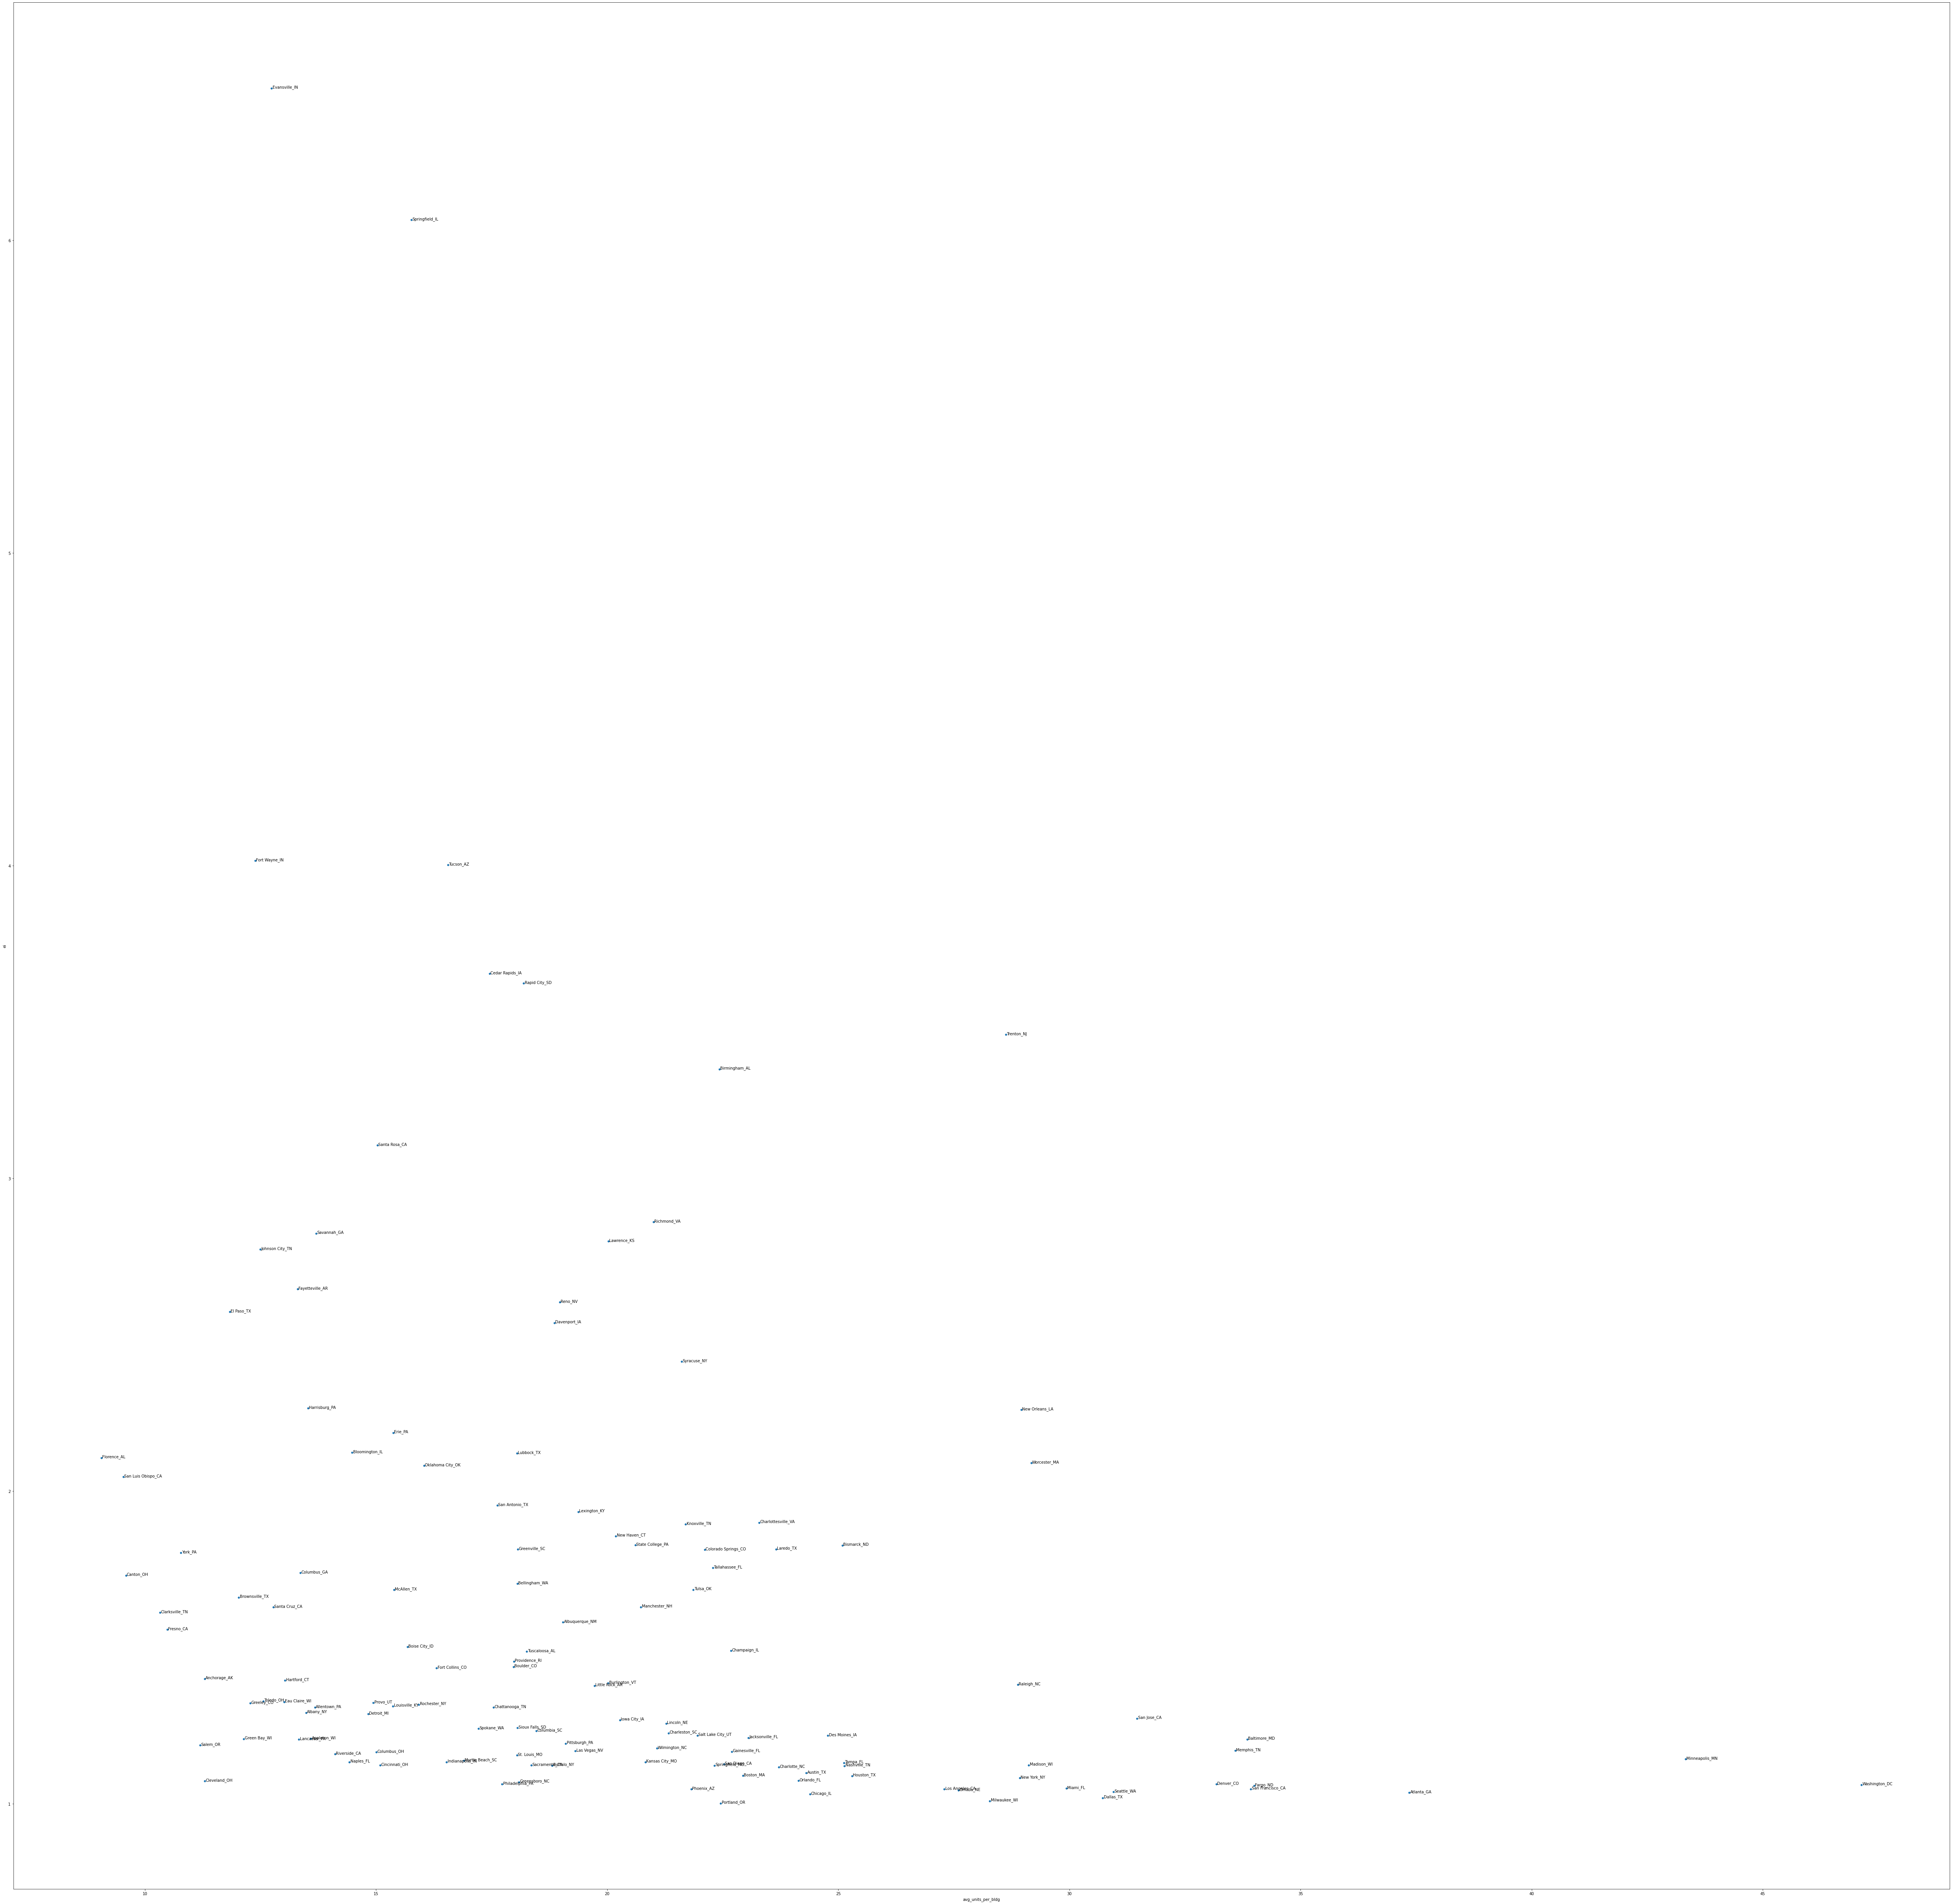

In [66]:
plt.figure(figsize=(90, 90))
ax = sns.scatterplot(x=scatter.avg_units_per_bldg, y=scatter.ei)



def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(scatter.avg_units_per_bldg, scatter.ei, scatter.city_state, plt.gca())
plt.show()

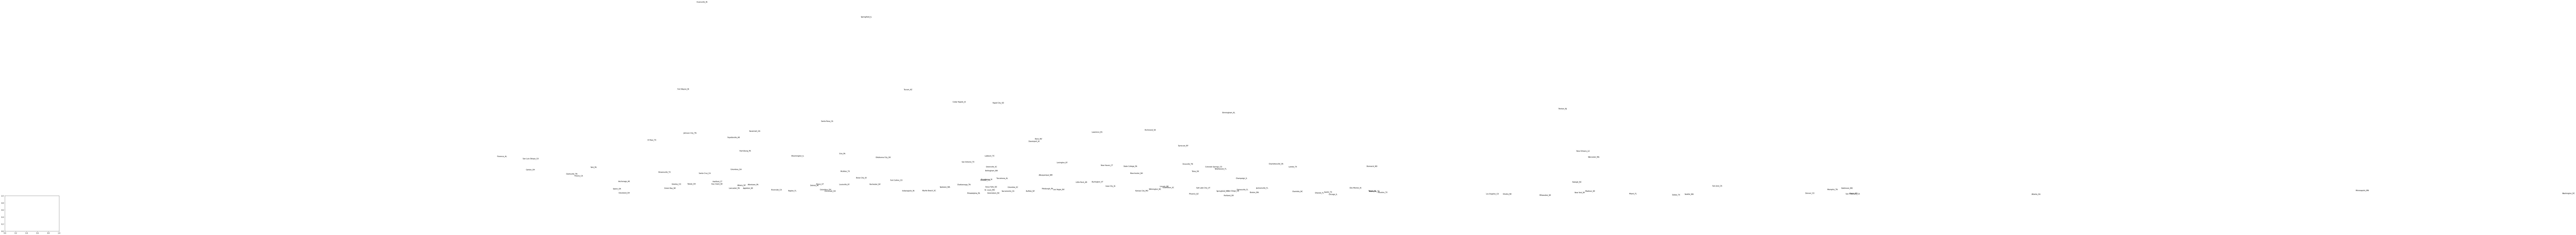

In [59]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(scatter.avg_units_per_bldg, scatter.ei, scatter.city_state, plt.gca())  

In [69]:
df[['total_high_density_units', 'total_high_density_bldgs', 'avg_units_per_bldg']].corr()

,total_high_density_units,total_high_density_bldgs,avg_units_per_bldg
total_high_density_units,1.000000,0.902484,0.285926
total_high_density_bldgs,0.902484,1.000000,0.080255
avg_units_per_bldg,0.285926,0.080255,1.000000


In [67]:
df.head()

,city,state,year,total_high_density_bldgs,total_high_density_units,total_high_density_value,avg_units_per_bldg,value_per_bldg,value_per_unit,city_state_high_density_bldgs_delta_pct,...,market_volume,market_volume_delta_pct,ei,city_state,five_or_more_units_bldgs_est_2y,five_or_more_units_value_est_2y,should_enter,market_share,market_index,enter_index
0,Albany,NY,1997,30.0,425.0,17871000.0,14.166667,5.957000e+05,42049.411765,NaN,...,2.054924e+10,-0.655038,NaN,Albany_NY,NaN,NaN,False,0.000870,NaN,NaN
1,Albany,NY,1998,47.0,1038.0,54232000.0,22.085106,1.153872e+06,52246.628131,0.566667,...,2.529787e+10,0.231085,2.465010,Albany_NY,NaN,NaN,False,0.002144,NaN,NaN
2,Albany,NY,1999,39.0,515.0,24484000.0,13.205128,6.277949e+05,47541.747573,-0.170213,...,2.609590e+10,0.031545,0.437662,Albany_NY,0.170673,0.472309,False,0.000938,0.000443,1.473690
3,Albany,NY,2000,25.0,346.0,16130000.0,13.840000,6.452000e+05,46618.497110,-0.358974,...,2.742204e+10,0.050818,0.626938,Albany_NY,0.625000,0.181828,False,0.000588,0.000107,1.182523
4,Albany,NY,2001,56.0,502.0,24536000.0,8.964286,4.381429e+05,48876.494024,1.240000,...,2.913103e+10,0.062322,1.431902,Albany_NY,-0.266667,-0.570875,False,0.000842,-0.000481,0.429487


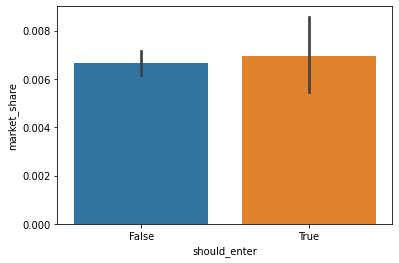

In [70]:
sns.barplot(x=df.should_enter, y=df.market_share)